In [4]:
!pip install wordcloud

Cell 1:Import Libraries
explanation:
This cell loads the necessary Python libraries for our project:
requests is used to download text data from the web.
re provides regular expressions for searching and cleaning text.
Counter from the collections module helps count word frequencies.
WordCloud generates word cloud images.
matplotlib.pyplot is used to display the word clouds.



In [1]:
# Import essential libraries for text processing and visualization
import requests
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


Cell 2: Define Text Downloading Function
This function handles downloading text from a URL (like those from Project Gutenberg). It sends a web request with a browser-like header to avoid blocking. If successful, it writes the content to a .txt file on your local machine. Otherwise, it prints a failure message.



In [2]:
# Function to download and save text from Project Gutenberg
def download_text(url, filename):
    """
    Downloads a text file from a given URL and saves it locally.
    
    Parameters:
        url (str): The URL of the text file to download.
        filename (str): The name of the file to save the downloaded text.
    """
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.ok:
        with open(filename, "w", encoding="utf-8") as file:
            file.write(response.text)
        print(f"Saved: {filename}")
    else:
        print(f"Failed to retrieve {url}")


Cell 3: Download Texts from Project Gutenberg
This cell uses the download function to fetch three public domain texts. Each URL corresponds to a different topic—science, engineering, and history. The texts are saved locally with readable filenames for further processing.



In [3]:
# Downloading three texts related to science, engineering, and history
url_1 = "https://www.gutenberg.org/cache/epub/4137/pg4137.txt"
download_text(url_1, "The_Science_of_Getting_Rich.txt")

url_2 = "https://www.gutenberg.org/cache/epub/4173/pg4173.txt"
download_text(url_2, "The_Engineering_of_the_Human_Body.txt")

url_3 = "https://www.gutenberg.org/cache/epub/7142/pg7142.txt"
download_text(url_3, "The_History_of_the_Peloponnesian_War.txt")


Saved: The_Science_of_Getting_Rich.txt
Saved: The_Engineering_of_the_Human_Body.txt
Saved: The_History_of_the_Peloponnesian_War.txt


Cell 4: Define Tokenization Function
This function reads the content of a text file, converts everything to lowercase to ensure consistency, and then uses regular expressions to extract all word-like sequences. The result is a list of clean tokens (words) ready for analysis.


In [4]:
# Function to tokenize text into individual words
def tokenize_text(file_name):
    """
    Reads a text file, converts it to lowercase, and tokenizes it into words.
    
    Parameters:
        file_name (str): The name of the file to tokenize.
    
    Returns:
        list: A list of tokenized words.
    """
    with open(file_name, "r", encoding="utf-8") as file:
        text = file.read()
    tokens = re.findall(r"\b\w+\b", text.lower())
    return tokens


Cell 5: Tokenize All Three Texts and Print Token Counts
Here we apply the tokenization function to each of the downloaded texts. After tokenizing, we count and print how many words (tokens) each text contains. This gives a sense of the size of each dataset.

In [5]:
# Tokenize the three texts
tokens_1 = tokenize_text("The_Science_of_Getting_Rich.txt")
tokens_2 = tokenize_text("The_Engineering_of_the_Human_Body.txt")
tokens_3 = tokenize_text("The_History_of_the_Peloponnesian_War.txt")

# Print token counts for each text
print("Token counts:")
print(f"- The Science of Getting Rich: {len(tokens_1)} tokens")
print(f"- The Engineering of the Human Body: {len(tokens_2)} tokens")
print(f"- The History of the Peloponnesian War: {len(tokens_3)} tokens")


Token counts:
- The Science of Getting Rich: 23960 tokens
- The Engineering of the Human Body: 21027 tokens
- The History of the Peloponnesian War: 208525 tokens


Cell 6: Define Function to Find Most Common Words
This function takes a list of words and returns the n most frequently occurring ones. It uses Python’s built-in Counter to tally word frequencies efficiently, returning the results as a list of word–frequency pairs.

In [6]:
# Function to find most common words
def most_common_words(tokens, n=10):
    """
    Counts the frequency of words in a list of tokens and returns the most common words.
    
    Parameters:
        tokens (list): A list of words (tokens).
        n (int): The number of most common words to return.
    
    Returns:
        list: A list of tuples containing the most common words and their frequencies.
    """
    word_counts = Counter(tokens)
    return word_counts.most_common(n)


Cell 7: Get and Print Common Words for Each Text 
We now apply the most_common_words function to each set of tokens, extracting the top 10 words from each text. This gives a quick overview of what themes or terms are repeated most frequently across different domains.

In [7]:
# Analyze word frequency for each text
common_words_1 = most_common_words(tokens_1)
common_words_2 = most_common_words(tokens_2)
common_words_3 = most_common_words(tokens_3)

# Print most common words for each text
print("\nMost common words in each text:")
print("- The Science of Getting Rich:")
print(common_words_1)
print("\n- The Engineering of the Human Body:")
print(common_words_2)
print("\n- The History of the Peloponnesian War:")
print(common_words_3)



Most common words in each text:
- The Science of Getting Rich:
[('and', 1309), ('the', 1080), ('to', 1040), ('of', 575), ('i', 522), ('my', 498), ('a', 381), ('in', 377), ('with', 320), ('s', 267)]

- The Engineering of the Human Body:
[('the', 1016), ('and', 1015), ('to', 839), ('of', 576), ('i', 382), ('a', 324), ('in', 293), ('that', 272), ('my', 265), ('with', 234)]

- The History of the Peloponnesian War:
[('the', 18148), ('and', 8550), ('of', 7662), ('to', 7606), ('in', 4273), ('their', 2806), ('a', 2754), ('that', 2461), ('they', 2423), ('by', 2079)]


Cell 8: Define Word Cloud Generation Function
This function creates a word cloud, a visual way to display word frequency where more frequent words appear larger. It joins the tokens into a single string and passes it to the WordCloud generator, which is then plotted with matplotlib.

In [10]:
# Function to generate a word cloud from tokens
def generate_word_cloud(tokens, title="Word Cloud"):
    """
    Generates and displays a word cloud from a list of tokens.
    
    Parameters:
        tokens (list): A list of words (tokens).
        title (str): The title of the word cloud plot.
    """
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    # Display using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()


Cell 9: Generate Word Clouds for All Three Texts
Finally, we generate and display a word cloud for each text. This helps visually identify dominant words and can give insights into major themes or subjects emphasized in each domain.




Generating word clouds for visualization...


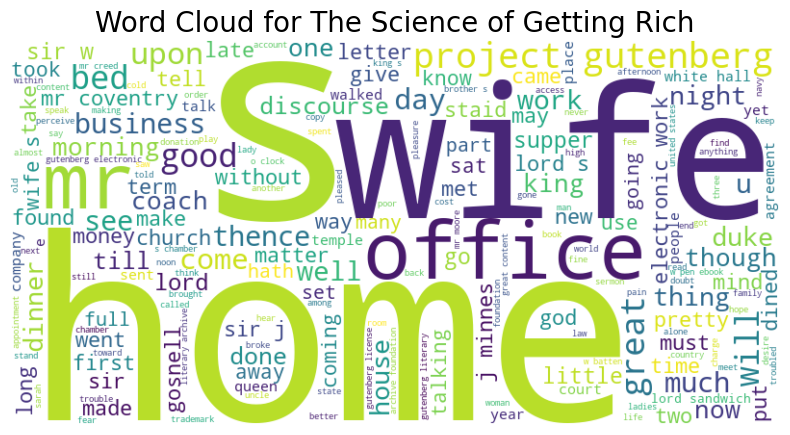

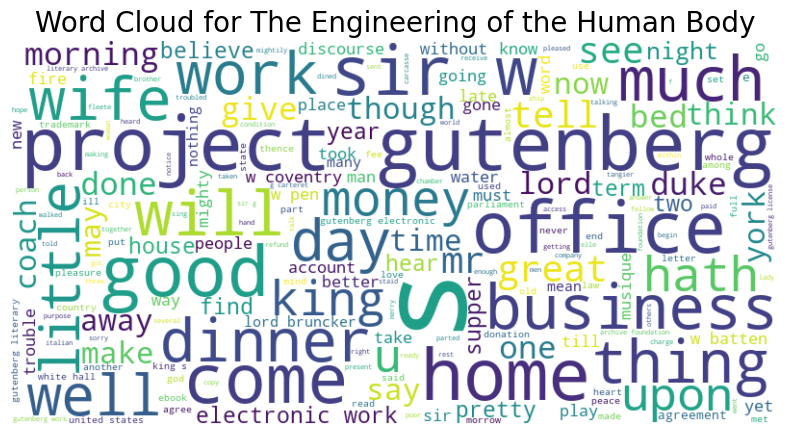

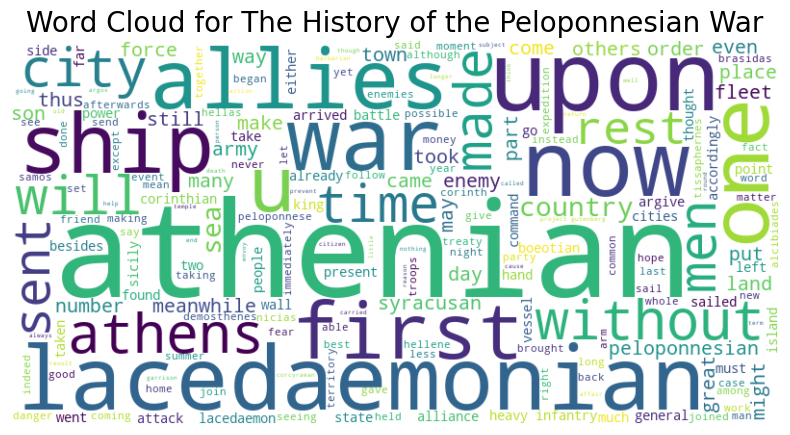

In [9]:
# Visualize word usage with word clouds
print("\nGenerating word clouds for visualization...")
generate_word_cloud(tokens_1, "Word Cloud for The Science of Getting Rich")
generate_word_cloud(tokens_2, "Word Cloud for The Engineering of the Human Body")
generate_word_cloud(tokens_3, "Word Cloud for The History of the Peloponnesian War")


Cell 10: Final Summary

In [ ]:
#  Final Summary:
# - The script downloads and processes three different texts from Project Gutenberg.
# - It tokenizes each text to analyze individual word usage.
# - It calculates and prints the most frequently used words.
# - It visualizes the results using word clouds for clearer interpretation.
#
#  This kind of analysis can be useful in understanding thematic focus,
# vocabulary density, and stylistic patterns in various genres or authors.
